# Data Preprocessing Demo
This notebook serves to demo the data preprocessing for both training and inference

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings("ignore")
from utils import load_image_label_paths, process_raw_data, read_image_label_raw
%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = './data/Test'

In [3]:
image_paths, label_paths = load_image_label_paths(DATA_DIR,sort=True)

In [5]:
images = []
labels = []
image_files = []
for image_file in image_paths[:100]:
  image_raw, label_raw = read_image_label_raw(image_file, label_paths)
  image, label = process_raw_data(image_raw,label_raw,crop = (102,518))
  images.append(image)
  labels.append(label)
  image_files.append(image_file)

## Display Cropped Images and Labels

./data/Test/CameraRGB/75.png


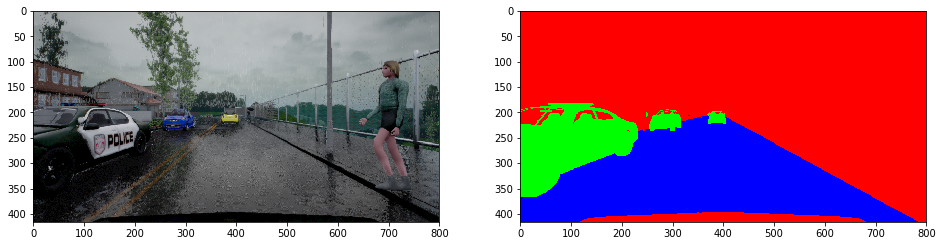

In [6]:
import random
idx = random.randint(0,len(images)-1)
print(image_files[idx])
plt.subplot(121)
plt.imshow(images[idx])
plt.subplot(122)
plt.imshow(labels[idx]*255)
plt.gcf().set_size_inches(16,16)

## Observe image spatial distribution

In [7]:
data_dir= os.path.join('/media/gexd7127/linux/Dropbox (MIT)/git/Udacity/Lyft_challenge/data_raw','Train')
image_paths, label_paths = load_image_label_paths(data_dir)

In [8]:
car_heat_map = np.zeros([600,800])
raod_heat_map = np.zeros([600,800])
outliers = []
i = 1 
for image_file in image_paths:
  image_raw, label_raw = read_image_label_raw(image_file, label_paths)
  car_label = np.where(label_raw[:,:,0]==10,1,0)
  road_label = np.where(label_raw[:,:,0]==7,1,0)
  car_heat_map += car_label
  raod_heat_map += road_label
  if np.sum(car_label) != 0:
    if np.min(np.where(car_label==1)[0]) < 200:
      outliers.append(image_raw)
  print("Processing frame: {}/{}".format(i,len(image_paths)),end='\r')
  i +=1

### Plot outlier images

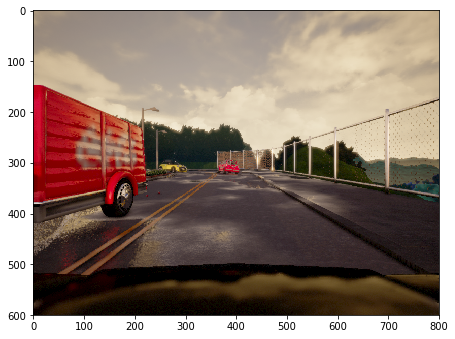

In [9]:
plt.subplot(121)
plt.imshow(outliers[0])
plt.gcf().set_size_inches(16,16)

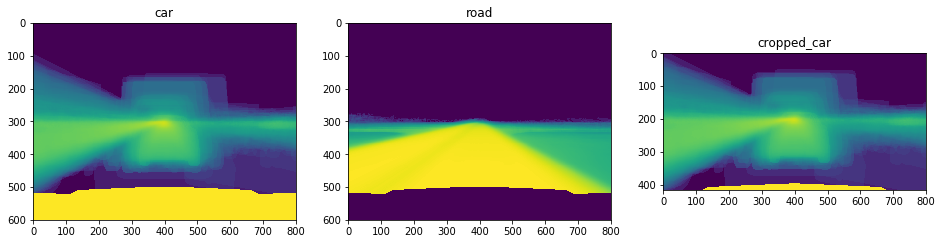

In [10]:
plt.subplot(131)
plt.title('car')
plt.imshow(np.log(car_heat_map+1))
plt.subplot(132)
plt.title('road')
plt.imshow(np.log(raod_heat_map+1))
plt.subplot(133)
plt.title('cropped_car')
plt.imshow(np.log(car_heat_map[102:518]+1))
plt.gcf().set_size_inches(16,8)